# Ejercicio 6 - Introducción al Aprendizaje No Supervizado
## Inteligencia Artificial - Ing. en Sistemas de Información 
## UTN Facultad Regional Villa Maria
### Natalia Bruno - Legajo: 10683

1. Tomar el dataset seleccionado para el ejercicio de la clase pasada y hacerle un PCA. Mostrar cómo está explicada la varianza en base a los distintos componentes principales.
2. Mostrar gráficamente cómo el primer y el segundo componente principal describen la varianza de los datos (hacer un gráfico similar al mostrado en esta clase con el Iris dataset pero para el nuevo dataset).
3. Entrenar nuevamente uno de los clasificadores seleccionados para el ejercicio pasado para un conjunto de componentes principales que considere conveniente, utilizando la correspondiente semilla de random_state. Mostrar cuánto difiere la tasa de aciertos con respecto al modelo utilizado en el ejercicio anterior. (Nota: la cantidad de componentes utilizada debe ser menor a la cantidad de features del conjunto original).
4. Responder: bajo su criterio, ¿se justifica realizar la transformación de los features con PCA para el dataset seleccionado? Explicar por qué; en caso afirmativo, ¿cuántos componentes principales seleccionaría y por qué?

Fecha de entrega: **24/05/2017**

In [1]:
# Defino una semilla que corresponde a mi número de alumno
import numpy as np
semilla = 2

In [2]:
import pandas as pd

# Cargo el dataset del ejercicio anterior mediante Pandas
data = pd.read_csv('glass.csv')

# Divido el dataset en features y target
y = data['Type']
x = data[['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']]


### Punto 1

In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

#Dado que no se indica el numero de n_componentes todos los componentes se mantienen.
pca = PCA(random_state=semilla) 
print(pca)

# Antes de transformar los datos, los normalizo,
# Respecto a la media 0 y la desv. estándar 1
X_scaled = scale(x)
pca.fit(X_scaled)

# X_transformed son los datos X transformados linealmente con respecto a los componentes principales
X_transformed = pca.transform(X_scaled)

# Podemos ver los vectores de componentes de PCA...
# print('Componentes de PCA (ordenados desc. desde el 1° hasta el 9no vector): \n\n', pca.components_) 

# Notar que, por la restricción de la ortogonalidad, la máxima
# cantidad de componentes principales es la de los features de X
print(pca.explained_variance_)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=2,
  svd_solver='auto', tol=0.0, whiten=False)
[  2.51116373e+00   2.05007218e+00   1.40484399e+00   1.15786245e+00
   9.14002247e-01   5.27635193e-01   3.68958443e-01   6.38529478e-02
   1.60881782e-03]


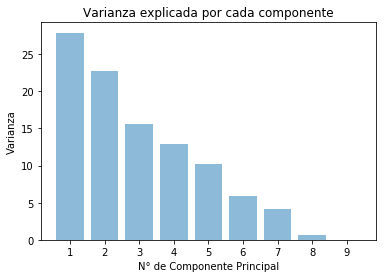

In [5]:
import matplotlib.pyplot as plt
# Visualizamos cuánto es explicada la varianza
# por cada uno de los componentes principales

y_pos = np.arange(9)

# pca.explained_variance_ratio_ es quien nos devuelve el gráfico de la varianza
var_exp = pca.explained_variance_ratio_

plt.bar(y_pos, np.round(100 * var_exp, decimals=1), align='center', alpha=0.5)

plt.xticks(y_pos, [1,2,3,4,5,6,7,8,9])
plt.xlabel('N° de Componente Principal')
plt.ylabel('Varianza')
plt.title('Varianza explicada por cada componente')
plt.show()

In [6]:
print(np.round(100 * var_exp, decimals=1))

[ 27.9  22.8  15.6  12.9  10.2   5.9   4.1   0.7   0. ]


In [7]:
cum_var_exp = np.cumsum(var_exp) 
# Cumulative variance explained
for i, sum in enumerate(cum_var_exp):
    print("PC" + str(i+1), "Variación acumulada: %.3f% %" %(cum_var_exp[i]*100))

PC1 Variación acumulada: 27.902%
PC2 Variación acumulada: 50.680%
PC3 Variación acumulada: 66.290%
PC4 Variación acumulada: 79.155%
PC5 Variación acumulada: 89.310%
PC6 Variación acumulada: 95.173%
PC7 Variación acumulada: 99.273%
PC8 Variación acumulada: 99.982%
PC9 Variación acumulada: 100.000%


Se puede observar que cerca del 90% de la varianza se puede explicar con los primeros 5 componentes principales.

### Punto 2

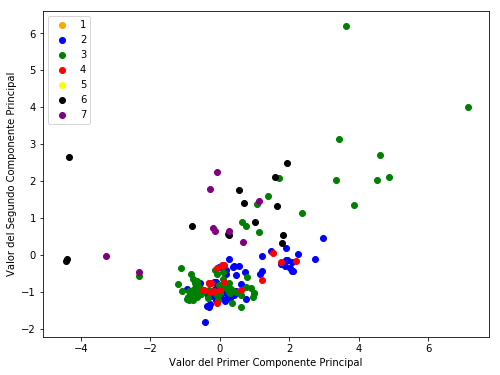

In [9]:
plt.figure(figsize=(8,6))

# El dataset elegido para el ejercicio tiene 7 targets por lo que repetimos la impresion para cada uno de ellos.

plot = plt.scatter(X_transformed[y==0, 0], X_transformed[y==0, 1], label=1, color='orange')
plot = plt.scatter(X_transformed[y==1, 0], X_transformed[y==1, 1], label=2, color='blue')
plot = plt.scatter(X_transformed[y==2, 0], X_transformed[y==2, 1], label=3, color='green')
plot = plt.scatter(X_transformed[y==3, 0], X_transformed[y==3, 1], label=4, color='red')
plot = plt.scatter(X_transformed[y==4, 0], X_transformed[y==4, 1], label=5, color='yellow')
plot = plt.scatter(X_transformed[y==5, 0], X_transformed[y==5, 1], label=6, color='black')
plot = plt.scatter(X_transformed[y==6, 0], X_transformed[y==6, 1], label=7, color='purple')


plt.xlabel('Valor del Primer Componente Principal')
plt.ylabel('Valor del Segundo Componente Principal')
plt.legend(loc='best', numpoints=1)
plt.show()

## Punto 3

Teniendo en cuenta los resultados obtenidos en el punto 2, quedando demostrado que la varianza de los datos queda explicada casi por los primeros 5 componentes principales, probé entrenar el clasificador con los 5, 4 y 3 primeros componentes, eligiendo los 4 primeros ya que con este número de componentes es donde obtuve la mayor tasa de aciertos. 

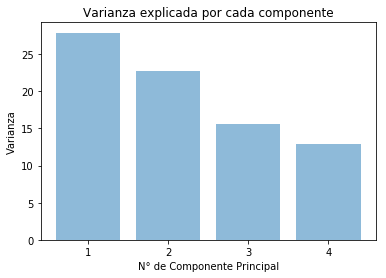

In [10]:
pca = PCA(n_components=4)

X_scaled = scale(x)
pca.fit(X_scaled)
X_transformed_principales = pca.transform(X_scaled)

y_pos = np.arange(4)
var_exp = pca.explained_variance_ratio_

plt.bar(y_pos, np.round(100 * var_exp, decimals=1), align='center', alpha=0.5)

plt.xticks(y_pos, [1,2,3,4])
plt.xlabel('N° de Componente Principal')
plt.ylabel('Varianza')
plt.title('Varianza explicada por cada componente')
plt.show()

In [12]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

clf_svm = SVC(random_state=semilla)

# Divido el conjunto en train, test
X_train, X_test, y_train, y_test = train_test_split(X_transformed_principales, y, test_size=0.25,  random_state=semilla)

# Entreno el modelo con el sub-conjunto de datos de entrenamiento
clf_svm.fit(X_train, y_train)
y_hat_svm = clf_svm.predict(X_test)

# Muestro el porcentaje de aciertos del clasificador
score_svm = clf_svm.score(X_test,y_test)

print(score_svm)
print("Mean score = %.3f, Std deviation = %.3f"%(np.mean(score_svm),np.std(score_svm)))

0.703703703704
Mean score = 0.704, Std deviation = 0.000


## Punto 3

En mi caso, el dataset utilizado no es demasiado grande por lo que el costo computacional que implica el procesamiento de los datos sin transformación no es un criterio relevante para decidir si aplicar PCA o no. Sin embargo, podemos ver que al aplicar PCA y reducir el número de componentes principales, la tasa de aciertos aumenta, esto es debido a que los datos estan correlacionados y de esta manera estamos eliminando el ruido que esto genera. Al ir reduciendo la dimensionalidad del dataset comprobé que la tasa de aciertos aumenta obteniendo el mayor valor con 4 dimensiones pero a partir de ese punto si continúo disminuyendo los componentes principales la tasa de aciertos se reduce también.

Por lo que concluyo, SI se justifica realizar la transformación de los features con PCA y la cantidad de componentes principales que selecciono es 4.